In [10]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tk

import os
import ntpath
import re

from matplotlib.colors import ListedColormap

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tk
import os
import ntpath
import re
from matplotlib.colors import ListedColormap

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
import matplotlib as mpl
from matplotlib import rc, rcParams

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [11]:
# read the .out files and get Cv values
Cvs_dft = []
gauss_outs = []
output_counter = 0
Cvs_read_counter = 0
output_names = []

for filename in os.listdir():
    if filename.endswith(".out"):
        #print(os.path.join( filename))
        gauss_out = ntpath.basename(filename)
        gauss_outs.append(gauss_out)
        output_counter += 1
    elif filename.endswith(".csv"):
        Desired_Cvs = os.path.join(filename)
    else:
        continue

for gauss in gauss_outs:
    convergence_check = 0
    f = open(gauss,'r')
    liness = f.readlines()
    #print (liness[-1])
    for count, line in enumerate(liness):
        if re.search('CV', line, re.IGNORECASE):
            Cvs_read_counter += 1
            convergence_check = 1
            cv_line = liness[count+2].split()
            output_names.append(gauss)
            #print (cv_line[2])
            Cvs_dft.append(float(cv_line[2].replace("'","")))
    if convergence_check == 0:
        print ("gauss did not converged properly", gauss)
    
            
            

            #for string in line:

print ("Total output files: ", output_counter)
print ("Total successfully read Cvs: ", Cvs_read_counter)
print ("all done")
#search through the excel file to find Desired Cv
#ff = open(Desired_Cvs,'r')
gen_desired = pd.read_csv(Desired_Cvs)
#gen_desired = gen_desired.reset_index()

# get rid of .out form output files
output_names = [i.replace(".out","") for i in output_names]
print ("output names before conversion--------------------->\n", output_names)

for jj,ii in enumerate(output_names):
    p_counter = 0
    for kk,char in enumerate(ii):
        if char=="p":
            p_counter +=1
            if p_counter%2 ==1:
                output_names[jj] = output_names[jj][:kk+1].replace("p","(")+\
                                   output_names[jj][kk+1:]
            else:
                output_names[jj] = output_names[jj][:kk+1].replace("p",")")+\
                                   output_names[jj][kk+1:]
        
        # insert "=" instead of "d", "#" instead of "t" 
        output_names[jj] = output_names[jj].replace("d","=")
        output_names[jj] = output_names[jj].replace("t","#")

print ("output names after conversion------------------------->\n ", output_names)

# choose the SMILES that we have DFT values

# create .csv file
dft_smiles_cv = {}
for smile in output_names:
    dft_smiles_cv['SMILES'] = output_names 
    dft_smiles_cv['DFT_cv'] = Cvs_dft

    #output['Desired_cv'] = gen_desired['cv']

dft_smiles_cv = pd.DataFrame(dft_smiles_cv)
merged_output = pd.merge(gen_desired, dft_smiles_cv, on='SMILES') 
merged_output["RE"] = np.abs((merged_output["DFT_cv"] - merged_output["cv"])/ merged_output["DFT_cv"]*100)
output = pd.DataFrame(merged_output)
output.to_csv('./output/output_{}'.format(Desired_Cvs), index=False)

print ("average of RE: {} and Min: {} and Max: {}".\
       format(np.mean(np.abs(merged_output["RE"])), min(merged_output["RE"]), max(merged_output["RE"])))
print ("Total samples wrote in the output: ",len(output))

gauss did not converged properly NtCCpOpC1pCtNpCO1.out
Total output files:  52
Total successfully read Cvs:  51
all done
output names before conversion--------------------->
 ['CC12CC1C1CpdOpNC12', 'CC1CC1C', 'Cc1ccccc1CdO', 'CC1COCCOC1', 'CC1CpCpC2pCpCpCpC12', 'CC1pCpCpCppCpC1pCpC', 'CCc1conc1CC', 'CCCC12NC3C1OC32', 'CCCCpCppCpCCC', 'CCCpCCpOCpCpC', 'CCCpCOpOCCtN', 'CCCpdOpNCCpCpC', 'CCCtCCCpCppCpC', 'CCpCpCpCpCpCppCpO', 'CCpCpCpOpCpCppCpC', 'CCpCppCpC1CO1', 'CCpCtCC1CO1pCO', 'CCpdOpCpOppCdOpCdO', 'CCpdOpn1ccnc1N', 'CCpOpCC1pOpCOC1', 'CCpOpCpCpCpCppCpO', 'CCpOppCdOpC1pOpCC1', 'CCtCCCCpCpOC', 'CCtCCpCppCCpCC', 'CN1C2CCpdOpC1C2', 'Cn1ccpOCdOpnn1', 'CNCpdNpNCpdOpCO', 'COC1CpOpCC12CC2', 'COCC12NC1CC2C', 'COCC12NC1CC2C_avo', 'COCpdOpCpCpN', 'CtCC12C3C4CN1C4C32', 'CtCC1C2CpCpN3C1C23', 'CtCC1dCCpdOpNpCpC1', 'CtCC1NC1CCpCpdO', 'CtCC1NdCOC1CC', 'CtCC1NdCOC1CC_avo', 'CtCCCCpCppCpCC', 'CtCCpCppCCCpOC', 'CtCCpCppCdOpCpCpC', 'NdC1CCN1CpdOpCO', 'NdC1CdC2CCpOpC2O1', 'OC1CdCC2C3OC3C12', 'OCC1CCCOCC1'

In [12]:
## Statistics  (# DFT=True value, Des=prediction)

# total # of samples
N = len(merged_output["cv"])
print ("number of samples: ", N)
# Explained Variance R2 from sklearn.metrics.explained_variance_score
explained_variance_R2_DFT_des = explained_variance_score(merged_output["DFT_cv"], merged_output["cv"])
print ("explained_varice_R2_DFT_des", explained_variance_R2_DFT_des)

# mean absolute error 
MAE_DFT_des = mean_absolute_error(merged_output["DFT_cv"], merged_output["cv"])
print ("MAE_DFT_des", MAE_DFT_des)
MAE_DFT_des_=0
for dft, des in zip(merged_output["DFT_cv"], merged_output["cv"]):
    MAE_DFT_des_ = MAE_DFT_des_ + abs(des-dft)
MAE_DFT_des = MAE_DFT_des_/N
print ("MAE_DFT_des_manuallycal:", MAE_DFT_des)
# Fractioned MAE, more normalized
Fractioned_MAE_DFT_des = 0
for dft, des in zip(merged_output["DFT_cv"], merged_output["cv"]):
    Fractioned_MAE_DFT_des = Fractioned_MAE_DFT_des +  abs(des-dft)/des
Fractioned_MAE_DFT_des = Fractioned_MAE_DFT_des/N
print ("FMAE_DFT_des_manuallycal", Fractioned_MAE_DFT_des)

# root mean squared error (RMSE), sqrt(sklearn ouputs MSE)
RMSE_DFT_des = mean_squared_error(merged_output["DFT_cv"], merged_output["cv"])**0.5
print ("RMSE_DFT_des", RMSE_DFT_des)

Fractioned_RMSE_DFT_des = 0
for dft, des in zip(merged_output["DFT_cv"], merged_output["cv"]):
    Fractioned_RMSE_DFT_des = Fractioned_RMSE_DFT_des + ((des-dft)/des)**2
Fractioned_RMSE_DFT_des = (Fractioned_RMSE_DFT_des/N)**0.5
print ("Fractioned_RMSE_DFT_des", Fractioned_RMSE_DFT_des)



number of samples:  47
explained_varice_R2_DFT_des 0.9985793422516691
MAE_DFT_des 0.12138297872340406
MAE_DFT_des_manuallycal: 0.12138297872340406
FMAE_DFT_des_manuallycal 0.0035552678636166417
RMSE_DFT_des 0.2326101203411112
Fractioned_RMSE_DFT_des 0.006779695455062871


In [13]:
plt.rcParams["font.family"] = "Arial"

plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.fonttype'] = 42

mpl.font_manager.FontManager()


# make the numbers on axis bold
rc('font', weight='bold')

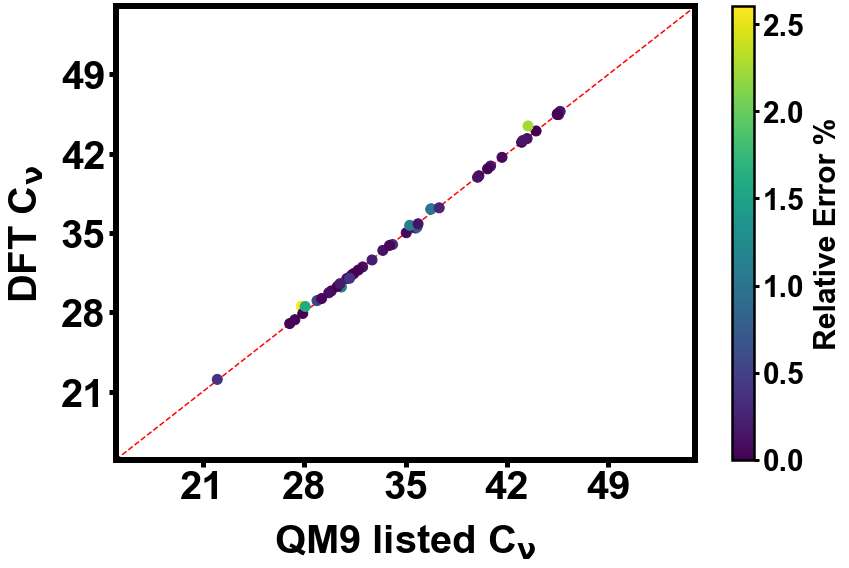

In [34]:
from scipy.optimize import curve_fit
import matplotlib as mpl

CV_range = (15, 55)
cMap = ListedColormap(['white', 'green', 'blue','red'])

Desired_cv = output["cv"]
DFT_cv = output["DFT_cv"]


col = np.abs((DFT_cv-Desired_cv)/DFT_cv*100)
col_orig = np.copy(col)



mpl.rcParams['axes.linewidth'] = 2.5
fig, ax = plt.subplots(figsize = (15*0.8, 10*0.8))
plt.scatter(Desired_cv, DFT_cv,s=100,c=col_orig)

ax.tick_params(axis='both', which='major', labelsize=25)

plt.xlabel(r'QM9 listed C$\mathbf{_\nu}$', fontsize=40, fontname='Arial', fontweight="bold", labelpad=15)
plt.ylabel(r'DFT C$\mathbf{_\nu}$', fontsize=40, fontname='Arial', fontweight="bold", labelpad=15)

ax.tick_params(axis='both', which='major', labelsize=40, width=5, length=7)
[i.set_linewidth(6) for i in ax.spines.values()]

plt.xlim(CV_range)
plt.ylim(CV_range)
# how many numbers on the axes, delta
ax.xaxis.set_major_locator(tk.MultipleLocator(7))
ax.yaxis.set_major_locator(tk.MultipleLocator(7))
ax.grid(False)

lims=[CV_range[0], CV_range[1]]
plt.plot(lims, lims, '--',c='red', alpha=1, zorder=0)


cbar = plt.colorbar(shrink=1)

#cbar.ax.set_ticks(20)


#cbar.set_ticks(loacator)
cbar.ax.set_ylabel('Relative Error %', fontsize=30, fontname='Arial', fontweight='bold', labelpad=10)
cbar.ax.tick_params(axis='both', which='major', labelsize=30,  width=3, length=5)

#cbar.ax.yaxis.set_major_locator(tk.MultipleLocator(0.5))
#cbar.solids.set_edgecolor("face")
#plt.draw()
plt.tight_layout()
plt.savefig('DFT_Des.png', dpi = 500, bbox_inches='tight')